## HMMA238 - TP noté : Jeu de la vie

*Cassandre LEPERCQUE* - 13 mars 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [2]:
import utils

**Question 1 :** Nous allons créer la chaîne de caractères `filename` correspondant au nom de notre fichier, de la forme suivante. 

In [3]:
filename = "HMMA238_TP_cassandrelepercque.ipynb"

**Question 2 :** Nous devons créer une variable `taille_str` qui compte le nombre de caractères dans la chaîne que nous venons de créer. 

In [4]:
taille_str = len(filename)
print("La taille de la chaine vaut :", taille_str)

La taille de la chaine vaut : 35


**Question 3 :** Nous devons créer une variable `ma_graine` qui vaut le reste de la division euclidienne de `taille_str` par 6. 

In [5]:
ma_graine = taille_str % 6
print("Le reste de la division euclidienne de notre chaine vaut :", ma_graine)

Le reste de la division euclidienne de notre chaine vaut : 5


### Implémentation sans `numpy`

   Nous allons dans cette partie, coder les cellules vivantes par des 1 et les cellules mortes par des 0.


**Question 4 :** Nous allons appliquer la fonction précédente à la liste *Z* (ci-après), et expliquer ce que représente la sortie obtenue `N=calcul_nb_voisins(Z)` (voir *utils*).

La fonction `calcul_nb_voisins` calcule le nombre de voisins de chaque case du jeu de la vie. 

In [6]:
#Liste Z :
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

def calcul_nb_voisins(Z): # calcul le nombre de voisins des cases d'un tableau
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]  + 0       +Z[x+1][y]  \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N    
# N[x][y] compte le nombre de 1 autour de la case [x,y]
# forme : longueur du tableau initial Z et celle du premier sous-tableau de Z -> Z[0]


Nombre_voisins = calcul_nb_voisins(Z)
print(Nombre_voisins)


[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


Nous obtenons, à partir d'une liste donnée, une nouvelle liste qui contient le nombre de voisins pour les différentes cases du jeu de la vie.



Nous définissons à présent la fonction `iteration_jeu` (voir *utils*) et nous y rajoutons une *docstring* qui décrit les entrées / sorties et ce que retourne la fonction.

Cette fonction `iteration_jeu` nous dit si la case est vivante ou morte, en effet elle met soit un 0 soit un 1 dans chaque case. 

In [7]:
def iteration_jeu(Z): #dit si une case est vivante ou morte.
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3): #regles d'isolement et d'etouffement.
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3: #regle de naissance.
                Z[x][y] = 1
    return Z
# if : règle d'etouffement et d'isolement
#elif : règle de naissance
# règle équilibre est automatique

print(iteration_jeu(Z))

[[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


**Question 5 :** Nous allons afficher les étapes du jeu sur 10 itérations, en utilisant une boucle `for`. Nous utliserons la fonction `subplot` de `matplotlib` pour afficher sur 2 lignes et 5 colonnes ces 10 matrices. 

Nous allons ensuite transformer ces listes en *array* pour pouvoir utiliser la fonction `imshow` de `matplotlib`. 

Text(0.5, 0.98, 'Itérations de 0 à 9 de Z')

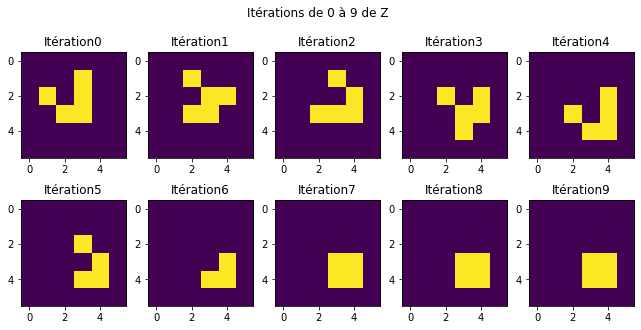

In [8]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

utils.afficher_iterations(iteration_jeu, Z) #voir utils
plt.suptitle("Itérations de 0 à 9 de Z") #titre général

**Question 6 :** Nous remarquons qu'entre l'itération 0 et 4, le jeu de la vie avance selon les règles dites, en effet nous remarquons des naissances et des morts de cellules. Nous pouvons aussi remarquer que les figures formées par les itérations impaires sont identiques à un décalage près et qu'il en va de même pour les itérations paires. 

Après l'itération 7, on remarque que les figures ne changent plus dû au fait que les itérations deviennent "stables". 

### Implémentation avec `numpy`

**Question 7 :** Nous devons exprimer ce que vaut le vecteur `nb_vect` définit comme suit.

In [9]:
vect = np.array([0, 1, 0, 0, 1, 1]) #taille 1 lignes et 6 colonnes.
nb_vect = np.zeros(vect.shape) #initialisation du vecteur nb_vect
            #meme taille que vect mais remplit de 0.
nb_vect[1:-1] += (vect[:-2] + vect[2:]) #remplit le vecteur sans prendre les bords.
#les valeurs de 1 à 4 sont remplacées par la somme des vecteurs vect[:-2] et vect[2:]

print(vect)
print(nb_vect)

[0 1 0 0 1 1]
[0. 0. 1. 1. 1. 0.]


Donc, le vecteur `nb_vect` compte le nombre de voisins d'un vecteur, ici le vecteur `vect`, sans prendre les bords car nous ne nous y intéressons pas, tout comme nous ne nous intéressons pas aux bords de la matrice représentant le jeu de la vie.

**Question 8 :** Nous devons créer une fonction `calcul_nb_voisins_np`, qui prend en entrée une matrice Z et qui ressort le nombre de voisins pour chaque entrée. Nous utiliserons 8 types de *slicing* pour obtenir le nombre de voisins. 

In [10]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]


def calcul_nb_voisins_np(Z):
    Z = np.array(Z)
    nb_voisins_np = np.zeros(Z.shape) #initialisation de notre matrice
    for i in range(1, len(Z)-1):
        for j in range(1, len(Z)-1):
            nb_voisins_np[i][j:j+1] += Z[i-1][j+1:j+2] + Z[i][j+1:j+2]\
             + Z[i+1][j+1:j+2]\
             + Z[i+1][j:j+1] + Z[i+1][j-1:j] + Z[i][j-1:j]\
             + Z[i-1][j-1:j] + Z[i-1][j:j+1]
    return(nb_voisins_np)

print(calcul_nb_voisins_np(Z))
    

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


**Question 9 :** Nous devons créer une fonction `interation_jeu_np`, qui prend comme entrée et sortie des `numpy array` et non plus des listes de listes. 

In [11]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]


def iteration_jeu_np(Z):
    Z = np.array(Z)
    N = calcul_nb_voisins_np(Z)
    for x in range(1, np.shape(Z)[0]-1):
        for y in range(1, np.shape(Z)[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return(Z)

print(iteration_jeu_np(Z))

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


**Question10 :** Nous devons créer une fonction `iteration_je_np` qui prend en entrée une matrice initiale, `Z_in` et un nombre d'itérations `nb_iter` et sort une matrice décrivant l'état du jeu de la vie après `nb_iter` itérations. 

In [12]:
def jeu_np(Z_in, nb_iter):
    for i in range(1, nb_iter+1):
        Z_in = iteration_jeu_np(Z_in)
    return(Z_in)

#test
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

Z_in = np.array(Z)
nb_iter = 6

print(jeu_np(Z_in, nb_iter))

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


**Question 11 :** Nous devons afficher un film, à l'aide la commande `animation.FuncAnimation` de **matplotlib**, qui représente les itérations du jeu de la vie quand on initialise avec la matrice `Z_huge` suivante :

In [13]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

<IPython.core.display.Javascript object>


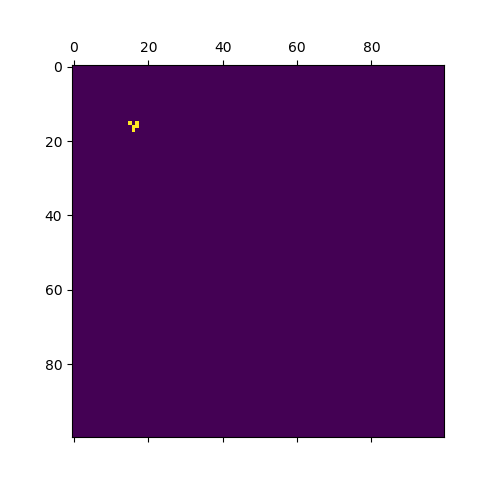

<IPython.core.display.Javascript object>


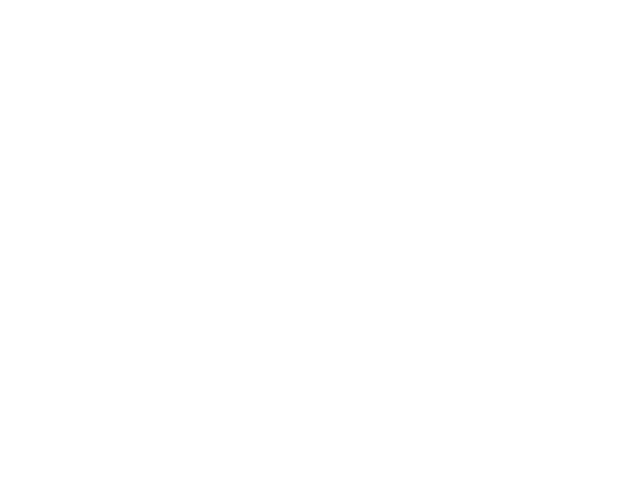

In [14]:
%matplotlib notebook
utils.video(Z_huge, jeu_np, 100)

**Question 12 :** En reprenant la question précédente, nous devons créer une matrice aléatoire de taille $100$x$100$, remplie de 1 et de 0 et dont la proportion de 1 est (en espérance) égale à (1 + `ma_graine`) * 10 / 100.

In [15]:
prop_active = (1 + ma_graine) * 10 / 100
print("Pour moi, cette variable prop_active vaut :", prop_active)

def matrix_alea(graine, matrix):
    prop_active = (1 + graine) * 10 / 100
    for i in range(1, np.shape(matrix)[0]-1):
        for j in range(1, np.shape(matrix)[1]-1):
            aleatoire = np.random.binomial(n=1, p=float(prop_active))
            matrix[i, j] = aleatoire
    return(matrix)

Z_huge = np.zeros((100, 100))
matrix_alea(ma_graine, Z_huge)

Pour moi, cette variable prop_active vaut : 0.6


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<IPython.core.display.Javascript object>


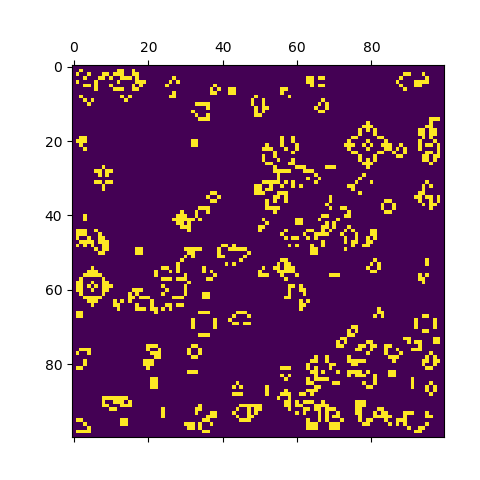

<IPython.core.display.Javascript object>


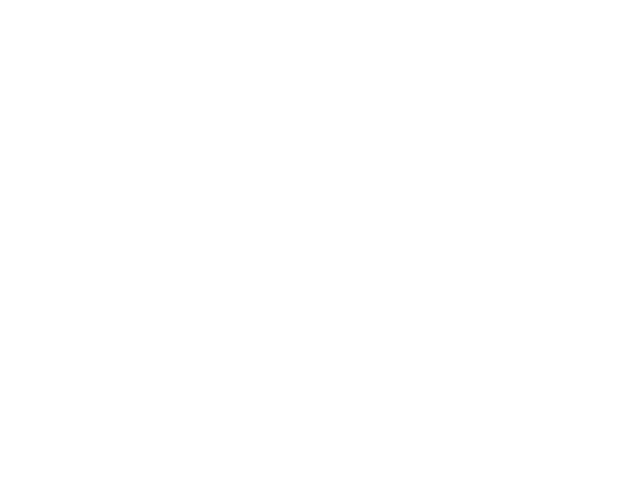

In [16]:
utils.video(Z_huge, jeu_np, 200)

**Question 13 :** Nous devons proposer et afficher avec `plt.imshow()` des matrices de taille $50$x$50$, ayant les propriétés suivantes: 

 - trois matrices simples qui représentent des jeux qui sont fixes dans le temps.
 - une matrice qui représente un jeu dont l'état oscille avec une période de deux.

***1ère étape : les trois matrices simples avec les jeux qui sont fixes dans le temps.***

<IPython.core.display.Javascript object>


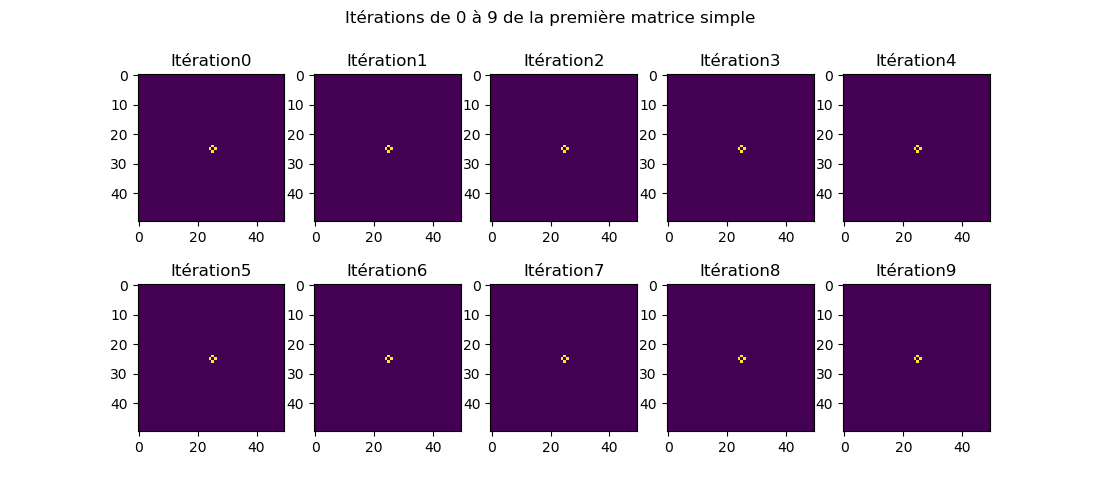

Text(0.5, 0.98, 'Itérations de 0 à 9 de la première matrice simple')

In [17]:
A = np.zeros((50, 50))
A[25, 24] = A[25, 26] = A[24, 25] = A[26, 25] = 1

utils.afficher_iterations(iteration_jeu, A) #affichage
plt.suptitle("Itérations de 0 à 9 de la première matrice simple") #titre général

<IPython.core.display.Javascript object>


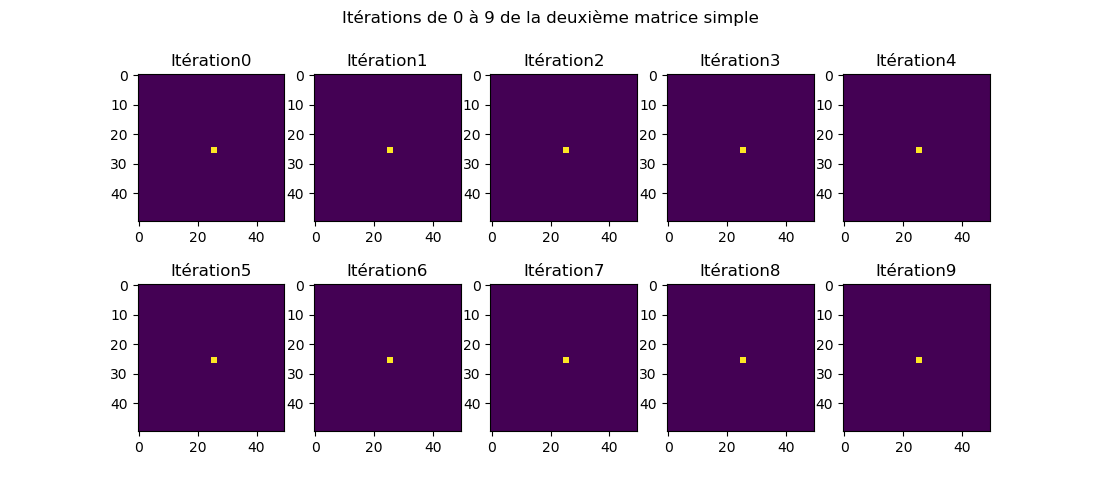

Text(0.5, 0.98, 'Itérations de 0 à 9 de la deuxième matrice simple')

In [18]:
B = np.zeros((50, 50))
B[25, 25] = B[25, 26] = B[26, 25] = B[26, 26] = 1

utils.afficher_iterations(iteration_jeu, B) #affichage
plt.suptitle("Itérations de 0 à 9 de la deuxième matrice simple") #titre

<IPython.core.display.Javascript object>


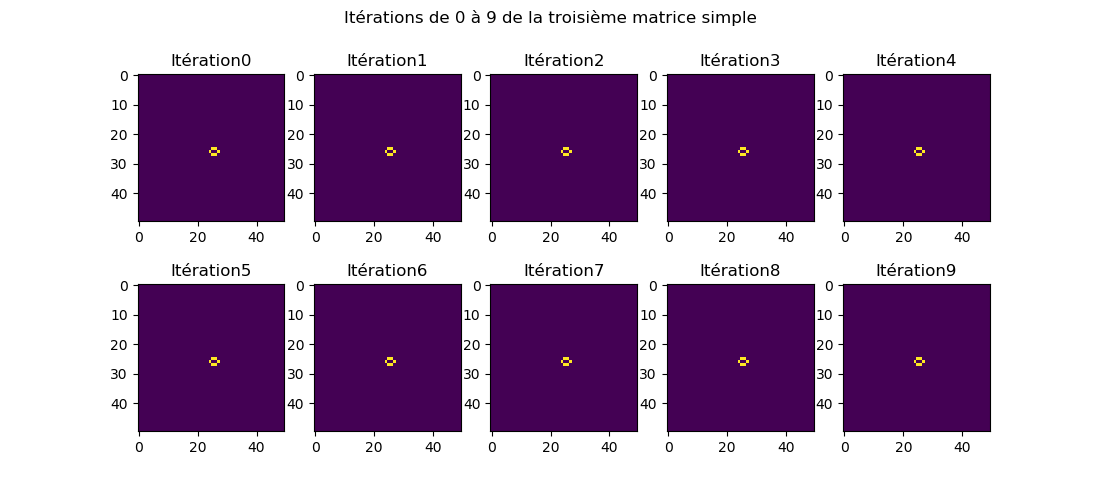

Text(0.5, 0.98, 'Itérations de 0 à 9 de la troisième matrice simple')

In [19]:
C = np.zeros((50, 50))
C[25, 25] = C[25, 26] = C[26, 24] = C[26, 27] = C[27, 25] = C[27, 26] = 1

utils.afficher_iterations(iteration_jeu, C) #affichage
plt.suptitle("Itérations de 0 à 9 de la troisième matrice simple") #titre 

***2ème étape : une matrice avec un jeu oscillant dans une periode de deux***

<IPython.core.display.Javascript object>


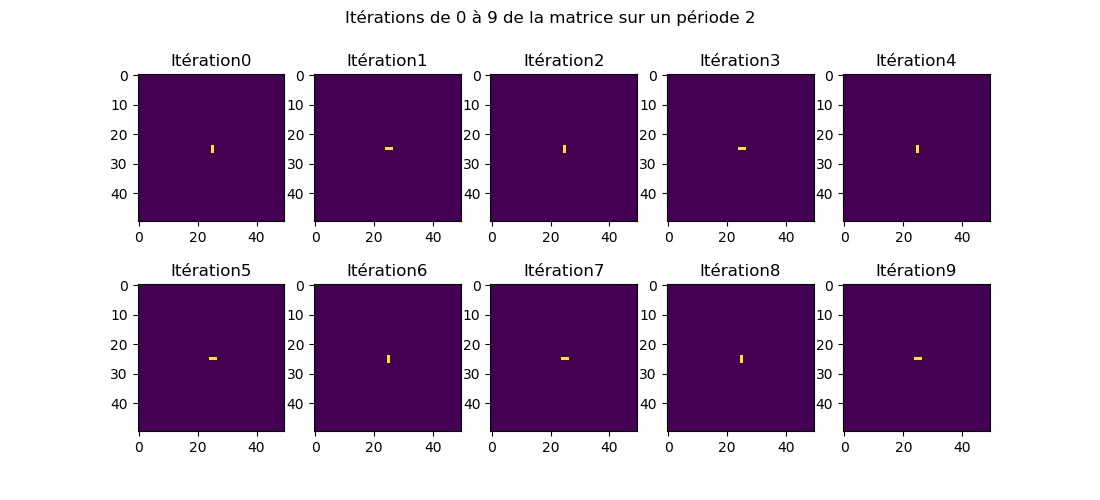

Text(0.5, 0.98, 'Itérations de 0 à 9 de la matrice sur un période 2')

In [20]:
D = np.zeros((50, 50))
D[25, 25] = D[24, 25] = D[26, 25] = 1

utils.afficher_iterations(iteration_jeu, D) #affichage
plt.suptitle("Itérations de 0 à 9 de la matrice sur un période 2") #titre 

**Question 14 :** Nous allons reprendre la formation précédente avec `numpy` et créer le jeu sous la forme d'une classe `JeuDeLaVie`. En particulier on utilisera comme moyen de stocker les itérations un tenseur tri-dimmensionnel. 

In [21]:
class JeuDeLaVie :
    "Jeu de la vie _time_T fois "
    def __init__(self, init_state, _time_T):
        self.init_state = init_state
        self._time_T = _time_T
        self._dimension = (n_1, n_2) = init_state.shape
        self._historic_state = np.zeros((n_1, n_2, _time_T+1))
        self._historic_state[:, :, 0] = self.init_state
        self.average_life = np.zeros((n_1, n_2))
    
    def play(self, _time_T):
        for t in range(1, _time_T+1):
            self._historic_state[:, :, t] = iteration_jeu_np(np.array(self._historic_state[:, :, t-1]))
        for i in range(self._dimension[0]):
            for j in range(self._dimension[1]):
                self.average_life[i, j] = sum(self._historic_state[i, j, ])/_time_T
        
    def plot(self):
        plt.matshow(self.average_life)
        plt.colorbar()
        plt.suptitle("Temps moyen de vie de chaque cellule.")

<IPython.core.display.Javascript object>


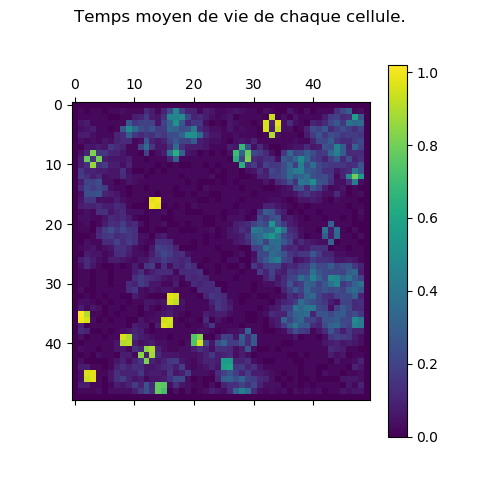

In [22]:
X = np.zeros((50, 50))
temps = 50

def matrix_alea(graine, matrix):
    prop_active = (1 + graine) * 10 / 100
    for i in range(1, np.shape(matrix)[0]-1):
        for j in range(1, np.shape(matrix)[1]-1):
            aleatoire = np.random.binomial(n=1, p=float(prop_active))
            matrix[i, j] = aleatoire
    return(matrix)

jeudelavie = matrix_alea(ma_graine, X)
jeudelavie = JeuDeLaVie(jeudelavie, temps)
jeudelavie.play(temps)
jeudelavie.plot()